In [93]:
import random
import itertools
import numpy as np

import matplotlib.pyplot as plt

#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [21]:
for i in range(10):
#     a = input()
    x =random.randint(0, 36)
    if x == 0:
        print(x, ' - green')
#         break
    elif x in (1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36):
        print(x, ' - red')
    else:
        print(x, ' - black')

19  - red
13  - black
35  - black
31  - black
29  - black
3  - red
30  - red
14  - red
21  - red
14  - red
10  - black
30  - red
13  - black
27  - red
16  - red
25  - red
31  - black
31  - black
18  - red
11  - black
20  - black
20  - black
35  - black
15  - black
23  - red
0  - green


#### 2. 
    1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.


In [15]:
# P(green) = 1/36
# P(red) = 18/36
# P(black) = 17/36
    
# P(A+B) = P(A) + P(B)
# P(black + green) = 18/36 = 1/2   
n_dict = {'green': 0, 'red': 0, 'black': 0}
n = 10000

for i in range(n):
    x = random.randint(0, 36)
    if x == 0:
#         print(x, ' - green')
        n_dict['green'] += 1
    elif x in (1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36):
#         print(x, ' - red')
        n_dict['red'] += 1
    else:
#         print(x, ' - black')
        n_dict['black'] += 1
     
print(n_dict)
print((n_dict['black'] + n_dict['green'])/n)

{'green': 274, 'red': 4910, 'black': 4816}
0.509


In [45]:
# два броска
# P(AB) = P(A)P(B)
# P(red*green) = 18/36 * 1/36 = 0.013(8)

n_green_and_red = 0
n = 10000

for i in range(n):
    x = np.random.randint(0, 36, 2)
    if x[0] == 0 and x[1] in (1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36):
        n_green_and_red += 1
    elif x[1] == 0 and x[0] in (1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36):
        n_green_and_red += 1
    

print(n_green_and_red/(2*n))

0.01315


    2) Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

In [61]:
np.random.seed(42)
samples = [np.random.rand(100) for i in range(10)]

n = 1000
X = [sum([random.choice(sample) for samle in samples]) for i in range(n)]
# X = [0] * n
# for i in range(n):
#     for sample in samples:
#         X[i] += random.choice(sample)

Text(0.5, 1.0, 'Histogram')

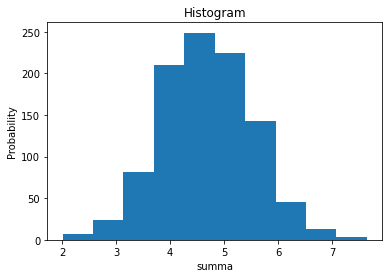

In [67]:
# распределение получается близкое к нормальному
num_bins = 10
n, bins, patches = plt.hist(X, num_bins)
plt.xlabel('summa')
plt.ylabel('Probability')
plt.title('Histogram');

#### 3.
    1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [90]:
# метод Монте-Карло для модели оследовательных независимых испытаний
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:  # два успеха в 4 подбрасываниях (2 орла, 2 решки)
        k = k + 1  # общее число успехов в n испытаний
        v=6*(0.5**k)*(0.5**(n-k))

# оценка вероятности
def bernully(n, k, p):
    p_n_k = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k)) \
                                                                            * p**k * (1 - p)**(n - k)
    return p_n_k

v = bernully(4, 2, 0.5)
# print(a, b, c, d)
#print(x)
print(f'число успехов: {k},\nчисло испытаний: {n},\nоценка вероятности: {k/n},\n'
      f'вероятность по Бернулли: {v}')

число успехов: 3740,
число испытаний: 10000,
оценка вероятности: 0.374,
вероятность по Бернулли: 0.375


    2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [91]:
k, n = 0, 10000
x = a + b + c
for i in range(0, n):
    if x[i] == 1:  # 1 успех в 3 подбрасываниях (1 орёл, 2 решки)
        k = k + 1  # общее число успехов в n испытаний

v = bernully(3, 1, 0.5)
print(f'число успехов: {k},\nчисло испытаний: {n},\nоценка вероятности: {k/n},\n'
      f'вероятность по Бернулли: {v}')

число успехов: 3734,
число испытаний: 10000,
оценка вероятности: 0.3734,
вероятность по Бернулли: 0.375


#### 4. (не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


In [96]:
# перестановки = n!
i = 0
for p in itertools.permutations("01234"):
#     print(''.join(p))
    i += 1

i

120

In [97]:
# размещения A(k, n) = n!/(n-k)!
i = 0
for p in itertools.permutations("012345", 3):
#     print(''.join(p))
    i += 1

i

120

In [115]:
# сочетания С(2, 4) = n!/k!(n-k)!
i = 0
for p in itertools.combinations("012345678", 4):
#     print(''.join(p))
    i += 1

i

126

#### 5. (не обязательно) Дополните код расчетом коэффициента корреляции x и y по формуле

$$R = \frac{\sum(x_i-x_m)(y_i-y_m)}{\sqrt{\sum(x_i-x_m)^2\sum(y_i-y_m)^2}}$$

0.6761232874427241 0.1678499454857684
0.6761232874427248 0.16784994548576826


C:\Users\013\AppData\Local\Temp/ipykernel_7708/676704793.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a1, b1 = np.linalg.lstsq(A, y)[0]


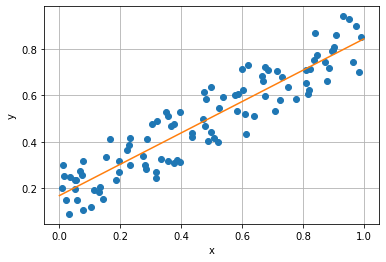

In [116]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# коэф-ты для линейной зависимости
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

# коэф-ты линейной регрессии из numpy
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)

plt.plot([0, 1], [b, a + b])
plt.show()

In [130]:
def corr_coef(x, y):
    x_m = np.mean(x)
    y_m = np.mean(y)
    r = np.sum((x - x_m) * (y - y_m) / np.sqrt(np.sum((x - x_m)**2) * np.sum((y - y_m)**2)))
    return r

In [131]:
corr_coef(x, y)

0.9258191563515326